# Predicting the prices of Avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

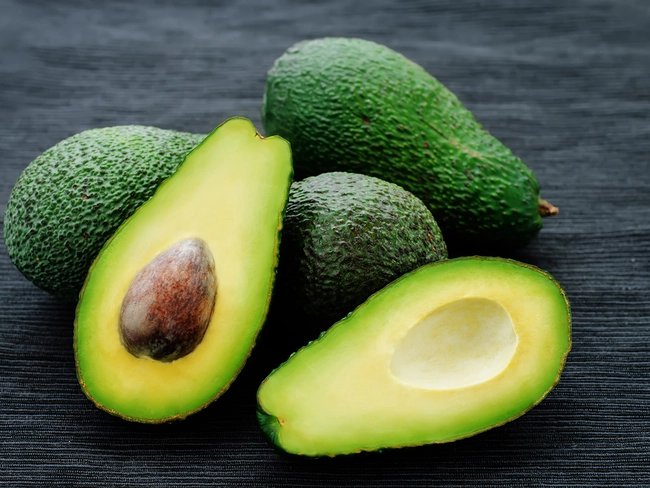

In [1]:
#display image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

data = pd.read_csv(r'C:\Users\aashutosh\OneDrive\Desktop\machine learning notes\8th - REGRESSION PROJECT\RESUME PROJECT -- PRICE PREDICTION\avocado.csv',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


There are 3 categorical features and luckily no missing value. Let's explore the data further.

In [3]:
data.head(3)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany

C:\Users\aashutosh\AppData\Local\Temp\ipykernel_18916\2985105532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice']);


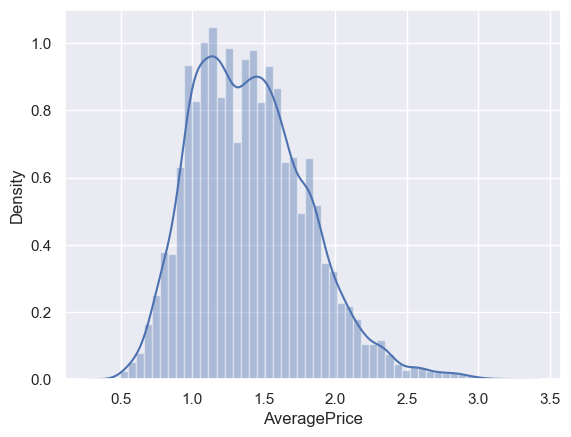

In [4]:
sns.distplot(data['AveragePrice']);

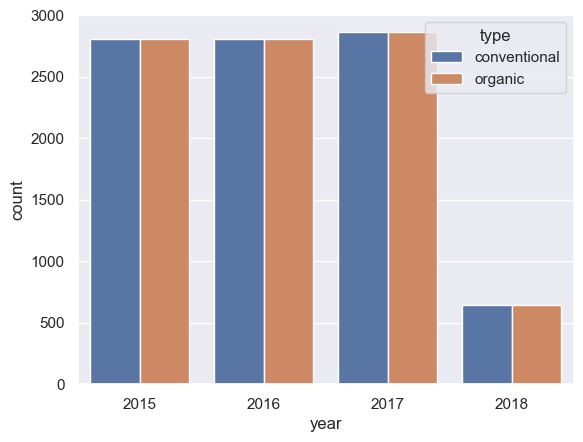

In [5]:
sns.countplot(x='year',data=data,hue='type');

There are almost equal numbers of conventional and organic avacados. Though, there is very less observations in the year 2018.

In [6]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

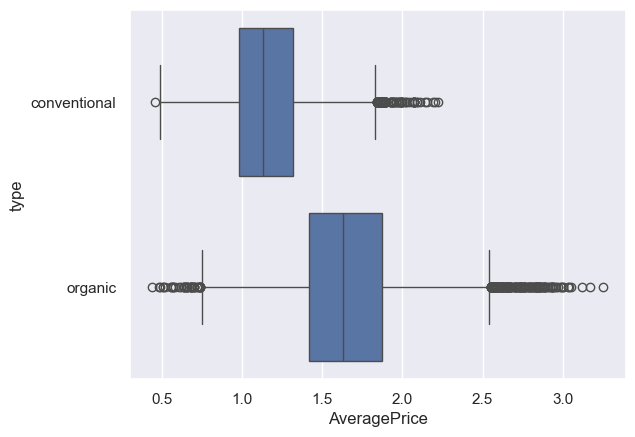

In [7]:
sns.boxplot(y="type", x="AveragePrice", data=data);

Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

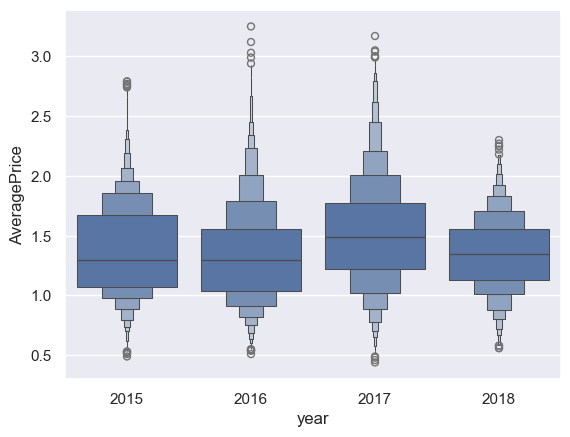

In [8]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

### Dealing with categorical features.

In [9]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

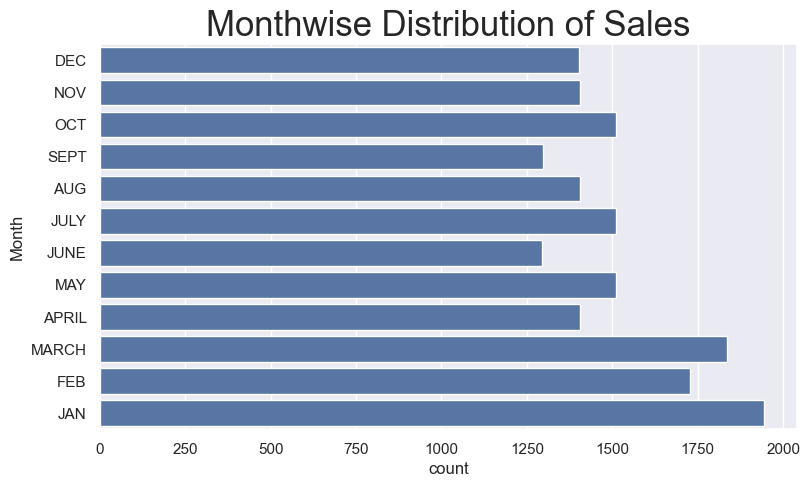

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales', fontdict={'fontsize':25});

It implies that sales of avacado see a rise in January, Febuary and March.

## Preparing data for ML models

In [12]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [16]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
!pip install xgboost


  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)


In [17]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [19]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [27]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Example early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# Example model structure
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # change this if you’re doing classification
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ✅ Fit the model
history = model.fit(
    x=X_train.values, 
    y=y_train.values,
    validation_data=(X_val.values, y_val.values),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/150


c:\Users\aashutosh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4917 - mae: 0.5177 - val_loss: 0.0917 - val_mae: 0.2315
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1027 - mae: 0.2449 - val_loss: 0.0709 - val_mae: 0.1995
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0839 - mae: 0.2233 - val_loss: 0.0618 - val_mae: 0.1868
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0757 - mae: 0.2120 - val_loss: 0.0577 - val_mae: 0.1803
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0723 - mae: 0.2043 - val_loss: 0.0554 - val_mae: 0.1764
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0662 - mae: 0.1961 - val_loss: 0.0528 - val_mae: 0.1723
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0631 - mae: 0.1901 - val_loss: 0.0507 - val_mae: 0.1682
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0601 - mae: 0.1856 - val_loss: 0.0487 - val_mae: 0.1642
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [22]:
X_train

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
12      0.651245  0.769285  0.269329 -0.112910    0.977974    0.559409   
24      0.085513 -0.157229  0.012513 -0.171290    0.500192    0.551107   
48     -0.244291 -0.231192 -0.242239 -0.216366   -0.239923   -0.241342   
35     -0.183292 -0.221537 -0.148953 -0.006016   -0.175252   -0.200402   
8      -0.221319 -0.229240 -0.214340 -0.215227   -0.196205   -0.225486   
..           ...       ...       ...       ...         ...         ...   
29     -0.244492 -0.231601 -0.244658 -0.216366   -0.237142   -0.239821   
9      -0.226198 -0.229827 -0.211149 -0.204176   -0.217635   -0.225284   
20      1.300118  2.212544  1.078469  0.163538    0.381420    0.462103   
23     -0.028742 -0.168846  0.135261  0.988790   -0.155569   -0.145960   
30      1.555316  2.626327  1.265475  1.764257    0.344929    0.495173   

    Large Bags  XLarge Bags  type  year_2016  ...  Month_DEC  Month_FEB  \
12    2.267004    -0.087235     0       True  ...      False      False   
24    0.346532    -0.170045     1      False  ...      False      False   
48   -0.218756    -0.170045     1       True  ...      False      False   
35   -0.098449     0.055903     0       True  ...      False      False   
8    -0.089320    -0.169886     0      False  ...      False      False   
..         ...          ...   ...        ...  ...        ...        ...   
29   -0.212111    -0.170045     1       True  ...      False      False   
9    -0.177511    -0.170045     0      False  ...      False      False   
20    0.137319    -0.169259     0      False  ...      False      False   
23   -0.190249     0.099733     0      False  ...      False      False   
30   -0.127665     0.007461     0      False  ...      False      False   

    Month_JAN  Month_JULY  Month_JUNE  Month_MARCH  Month_MAY  Month_NOV  \
12      False       False       False        False      False      False   
24      False        True       False        False      False      False   
48       True       False       False        False      False      False   
35      False       False       False        False      False      False   
8       False       False       False        False      False       True   
..        ...         ...         ...          ...        ...        ...   
29      False       False        True        False      False      False   
9       False       False       False        False      False      False   
20      False       False       False        False      False      False   
23      False        True       False        False      False      False   
30      False       False       False        False       True      False   

    Month_OCT  Month_SEPT  
12       True       False  
24      False       False  
48      False       False  
35      False       False  
8       False       False  
..        ...         ...  
29      False       False  
9        True       False  
20      False       False  
23      False       False  
30      False       False  

[10219 rows x 76 columns]

In [23]:
y_train

12    1.38
24    1.78
48    1.37
35    0.95
8     1.18
      ... 
29    1.54
9     1.22
20    0.89
23    1.59
30    0.98
Name: AveragePrice, Length: 10219, dtype: float64

In [24]:
# Convert all boolean columns to integers (0 and 1)
X_train = X_train.astype(float)
X_val = X_val.astype(float)

# Just to be safe, ensure y values are float too
y_train = y_train.astype(float)
y_val = y_val.astype(float)


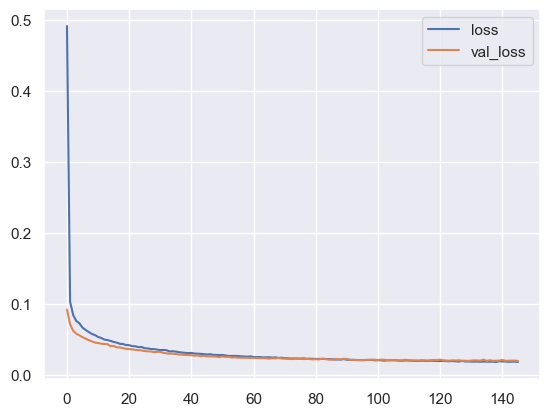

In [28]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [29]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


In [39]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

AttributeError: 'float' object has no attribute 'round'

In [33]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [38]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

In [37]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [35]:
from sklearn.metrics import r2_score

## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.